25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


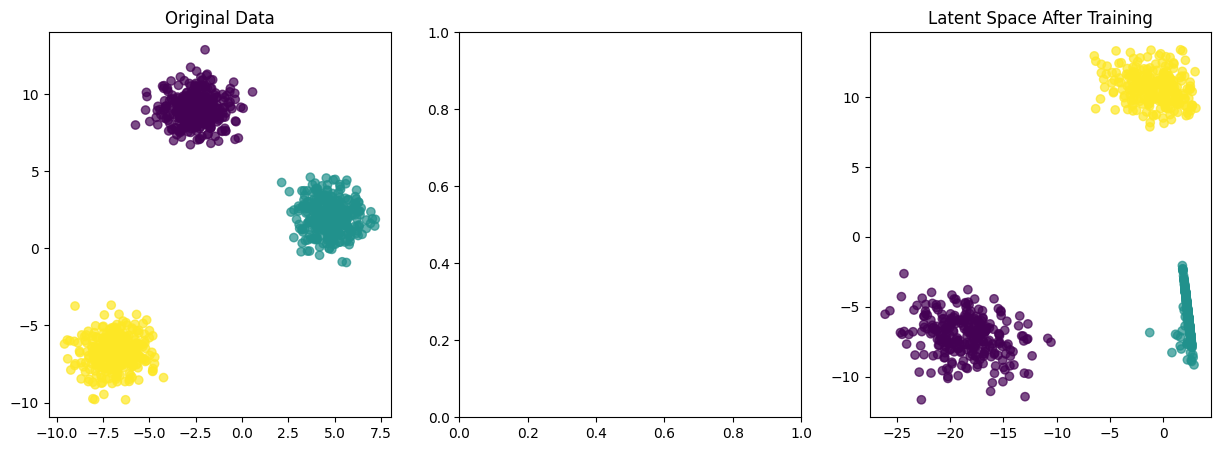

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Step 1: Generate Synthetic Data
def generate_data(n_samples=1000, n_features=2, n_classes=3, random_state=42):
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=random_state)
    return X, y

# Step 2: Visualize Data
def plot_data(X, y, title="Original Data", ax=None):
    if ax is None:
        ax = plt.gca()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    return scatter

# Step 3: Define Neural Network
def build_model(input_dim, output_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(8, activation='relu')(inputs)
    latent = Dense(2, activation='linear', name='latent_space')(x)  # 2D latent space
    outputs = Dense(output_dim, activation='softmax')(latent)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Visualize Latent Space
def plot_latent_space(encoder, X, y, title="Latent Space", ax=None):
    if ax is None:
        ax = plt.gca()
    latent_representations = encoder.predict(X)
    scatter = ax.scatter(latent_representations[:, 0], latent_representations[:, 1], c=y, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    return scatter

# Main Experiment
if __name__ == "__main__":
    # Generate and Split Data
    X, y = generate_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # One-Hot Encode Labels
    lb = LabelBinarizer()
    y_train_onehot = lb.fit_transform(y_train)
    y_test_onehot = lb.transform(y_test)

    # Plot Original Data
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plot_data(X, y, title="Original Data", ax=ax[0])

    # Build and Train Model
    model = build_model(input_dim=2, output_dim=len(np.unique(y)))
    model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)

    # Extract Encoder
    encoder = Model(inputs=model.input, outputs=model.get_layer('latent_space').output)

    # Visualize Latent Space After Training
    plot_latent_space(encoder, X_train, y_train, title="Latent Space After Training", ax=ax[2])

    plt.show()

Identified Themes:
Topic 1:
obsession awe creature powerful madness

Topic 2:
little unknowable infinite symbol great

Topic 3:
heart tale man struggle nature



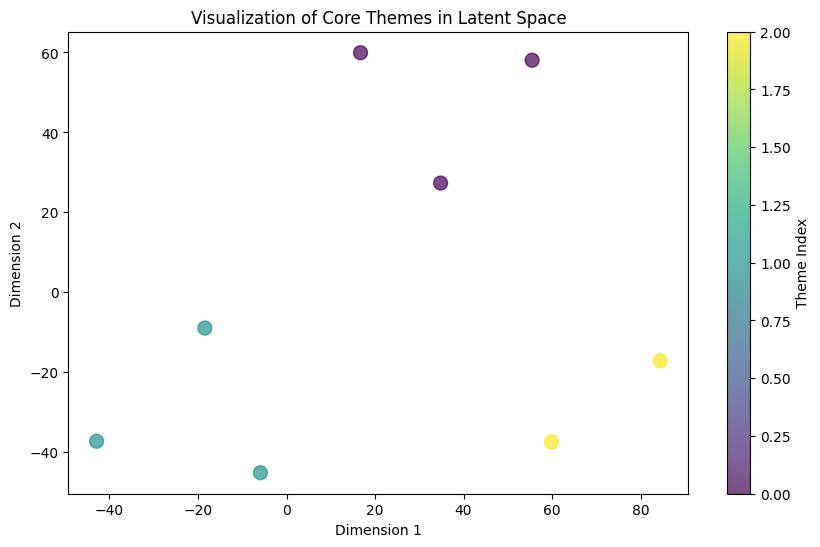

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

# Sample Input: Simplified Representation of "Moby Dick"
text_corpus = [
    "Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.",
    "There is a whale, vast and powerful, a creature of obsession and awe.",
    "Captain Ahab, driven by revenge, seeks the great white whale, Moby Dick.",
    "The sea is a place of mystery, danger, and philosophical musings.",
    "The Pequod sails across vast oceans, encountering strange creatures and perilous storms.",
    "Man's struggle against nature is at the heart of this tale.",
    "The great white whale is a symbol of the infinite, the unknowable.",
    "Ahab's obsession consumes him, drawing the crew into his madness."
]

# Step 1: Preprocess and Vectorize the Text
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(text_corpus)

# Step 2: Perform Topic Modeling
n_topics = 3  # Assume we want to extract 3 core themes
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Extract Themes and Words
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Identified Themes:")
display_topics(lda, feature_names, no_top_words=5)

# Step 3: Reduce Dimensions for Visualization
latent_topics = lda.transform(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(text_corpus) - 1))  # Adjust perplexity to avoid errors
reduced_topics = tsne.fit_transform(latent_topics)

# Step 4: Visualize Themes in 2D Space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_topics[:, 0], reduced_topics[:, 1], c=np.argmax(latent_topics, axis=1), cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label="Theme Index")
plt.title("Visualization of Core Themes in Latent Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### **Steps Toward the Algorithm of Platonic Forms of Representation**
Here’s how we might approach designing such an algorithm:

---

#### **1. Recognize the Noisy Representation**
- **Input:** A dataset or abstraction (e.g., the text of *Moby Dick*).
- **Goal:** Understand that the input is a **condensed and noisy version** of the true concept.
  - The book *Moby Dick* is a specific manifestation of "Moby Dickness."
  - Noise includes:
    - Redundant sentences.
    - Irrelevant details (e.g., tangential subplots or overly descriptive passages).
    - Cultural and temporal biases from the time it was written.

- **AI Task:** Identify the key themes, ideas, and patterns that define the input. For example:
  - In *Moby Dick*, the key themes might be obsession, the struggle between man and nature, and philosophical musings on existence.

---

#### **2. Decompose the Representation**
- Break down the input into its **components**, each of which contributes to the whole:
  - For a book:
    - Sentences → Paragraphs → Chapters → Themes → Core ideas.
  - For an image:
    - Pixels → Edges → Objects → Scenes → Concept.

- **Tools:** Use modern NLP techniques like topic modeling, semantic embeddings (e.g., BERT), or hierarchical attention models to extract these components.

---

#### **3. Analyze Missing Pieces**
- **Core Idea:** Reverse-engineer the missing elements that prevent the representation from achieving its Platonic Form.
  - What’s **missing** from the text of *Moby Dick* that would make it a perfect conceptualization of "Moby Dickness"?
  - For instance:
    - The book doesn’t explicitly show every aspect of obsession.
    - It might lack universal metaphors or perspectives that a modern reader would associate with the concept.

- **AI Task:** Identify gaps by comparing the representation against other related representations or concepts. For example:
  - Compare *Moby Dick* to other texts about obsession or man vs. nature.
  - Use multi-modal AI (text + image + video) to enrich the concept with visual or auditory elements.

---

#### **4. Construct the Platonic Form**
- **Recompose the components** into their most abstract and universal form:
  - This step involves synthesizing the core ideas into a shape that is **timeless**, **universal**, and **free from noise**.
  - Example for *Moby Dick*:
    - Simplify the narrative into a parable about obsession, stripping away unnecessary details.
    - Add universal metaphors that transcend time and culture (e.g., the whale as a representation of the infinite).

- **Tools:**
  - Generative AI models to recompose the data.
  - Reinforcement learning to evaluate how well the generated result aligns with the pure essence.

---

#### **5. Evaluate the Purity**
- How do you know you've found the Platonic Form?
  - **Metrics:**
    - Maximum compression: The representation is as concise as possible while retaining all meaning.
    - Universal interpretability: The representation resonates with all audiences and contexts.
    - Cross-modal consistency: The representation makes sense across text, images, sound, etc.

- **Human Feedback:** Philosophical inquiry can supplement AI-driven metrics to evaluate if the representation feels "pure."

---

### **The Perfect Conceptualization of 'Moby Dickness'**
If we were to take your example:
- The algorithm would refine the book *Moby Dick* into a timeless archetype of "Moby Dickness."
- This Platonic Form might not even resemble a book anymore:
  - It could be an abstract narrative graph, showing the arc of obsession.
  - It could combine visual and textual elements to represent the whale as the infinite and the hunt as human folly.
  - It would resonate with humans across cultures and time because it represents the **core truth** of the concept.

